<a href="https://colab.research.google.com/github/JuniaBS/Exercicios_Analise_de_Dados_com_Python/blob/main/Estat%C3%ADstica_Frequ%C3%AAncias_e_Medidas_Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.


In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [ ]:
 # Carregando dados DF
df_enem = pd.read_json('enem_2023.json')

In [ ]:
# Lendo as primeiras linhas
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
# Verificando quais colunas sao numéricas e quais categóricas.
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


## 1. Qual das disciplinas tem a maior amplitude de nota?


In [ ]:
# Calculando a amplitude
amplitude = df_enem.iloc[:, :5].max() - df_enem.iloc[:, :5].min()
amplitude

,0
Linguagens,517.456317
Ciências humanas,474.019695
Ciências da natureza,487.604568
Matemática,488.077902
Redação,729.160035


In [ ]:
# Identificando qual a disciplina com a maior amplitude
disciplina_maior_amplitude = amplitude.idxmax()  # Nome da disciplina
maior_amplitude = amplitude.max()  # Valor da maior amplitude

In [ ]:
# Imprimindo resultados
print(f'A disciplina com a maior amplitude é: {disciplina_maior_amplitude}')
print(f'A maior amplitude é: {maior_amplitude}')

A disciplina com a maior amplitude é: Redação
A maior amplitude é: 729.1600351395


##2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# Calculando a média
df_enem.iloc[:, :5].mean()

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [ ]:
# Removendo valores nulos
df_enem_clean = df_enem.dropna()

In [ ]:
# Calculando a mediana
df_enem_clean.iloc[:, :5].median()

,0
Linguagens,517.128831
Ciências humanas,528.503263
Ciências da natureza,502.935209
Matemática,532.961486
Redação,639.602691


## 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [ ]:
# Definindo os pesos
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

In [ ]:
# Calcular a nota com os pesos para cada estudante
df_enem['Media_ponderada'] = (df_enem['Redação'] * pesos['Redação'] +
                                    df_enem['Matemática'] * pesos['Matemática'] +
                                    df_enem['Linguagens'] * pesos['Linguagens'] +
                                    df_enem['Ciências humanas'] * pesos['Ciências humanas'] +
                                    df_enem['Ciências da natureza'] * pesos['Ciências da natureza'])/ sum(pesos.values())

In [ ]:
# Selecionando os 500 estudantes mais bem colocados (baseado na nota com os pesos)
melhores = df_enem.nlargest(500, 'Media_ponderada')

In [ ]:
# Calculando a média das notas
media = melhores['Media_ponderada'].mean()

In [ ]:
# Calculando o desvio padrão das notas
desvio_padrao = melhores['Media_ponderada'].std()

In [ ]:
print(f"Média das notas dos 500 melhores candidatos:{media}.")
print(f"Desvio padrão das notas dos 500 melhores candidatos:{desvio_padrao}.")

Média das notas dos 500 melhores candidatos:557.2896772018769.
Desvio padrão das notas dos 500 melhores candidatos:40.435866299464266.


## 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
# Selecionando os 40 candidatos
aprovados = melhores.head(40)

In [ ]:
# Calculando a variância das notas
variancia_aprovados = melhores['Media_ponderada'].var()

In [ ]:
# Calculando a média das notas
media_aprovados = melhores['Media_ponderada'].mean()

In [ ]:
# Imprimindo a resposta
print(f"Média das notas dos candidatos aprovados em Ciência da Computação: {media_aprovados}.")
print(f"Variância das notas dos candidatos aprovados em Ciência da Computação: {variancia_aprovados}.")

Média das notas dos candidatos aprovados em Ciência da Computação: 557.2896772018769.
Variância das notas dos candidatos aprovados em Ciência da Computação: 1635.0592833881497.


## 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
# Calculando o teto do terceiro quartil para as disciplinas
terceiro_quartil_matematica = df_enem['Matemática'].quantile(q=0.75)
terceiro_quartil_linguagens = df_enem['Linguagens'].quantile(q=0.75)

In [ ]:
# Imprimindo o resultado
print("Teto do terceiro quartil para Matemática:", np.ceil(terceiro_quartil_matematica))
print("Teto do terceiro quartil para Linguagens:", np.ceil(terceiro_quartil_linguagens))

Teto do terceiro quartil para Matemática: 593.0
Teto do terceiro quartil para Linguagens: 572.0


## 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?


In [ ]:
# Criando um novo DataFrame com as coluna de Redação
df_redacao = df_enem['Redação']

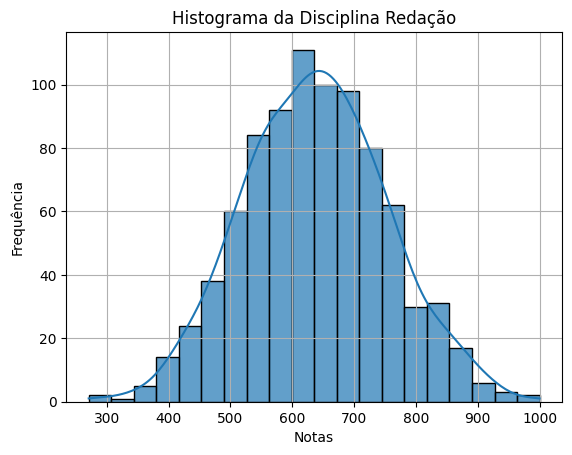

In [ ]:
# Criando o histograma
sns.histplot(data=df_redacao, bins=20, alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma da Disciplina Redação')

# Exibindo o histograma
plt.grid(True)
plt.show()

In [ ]:
# Criando um novo DataFrame com a coluna Linguagens
df_linguagens = df_enem['Linguagens']

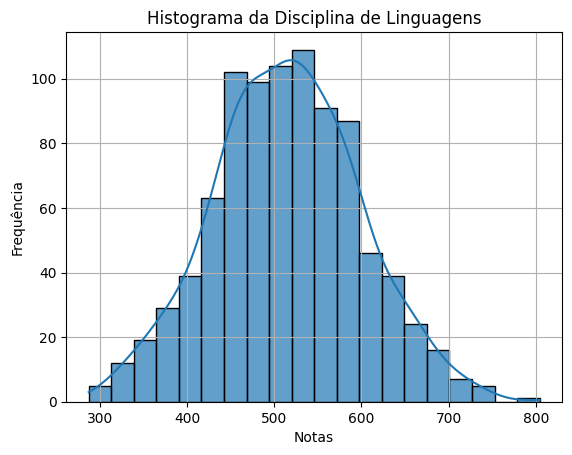

In [ ]:
# Criando o histograma
sns.histplot(data=df_linguagens, bins=20, alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma da Disciplina de Linguagens')

# Exibindo o histograma
plt.grid(True)
plt.show()

## Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?
Ao observar o histograma notamos a Simetria o que indica que as pontuações de Redação e Linguagens são distribuídas de forma equilibrada em torno da média central, não apresentando tendência para valores mais altos ou mais baixos. Isto demonstra uma distribuição Simétrica em que a maioria das notas está agrupada perto da média e as notas acima e abaixo da média são semelhantes em frequência.

## 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])



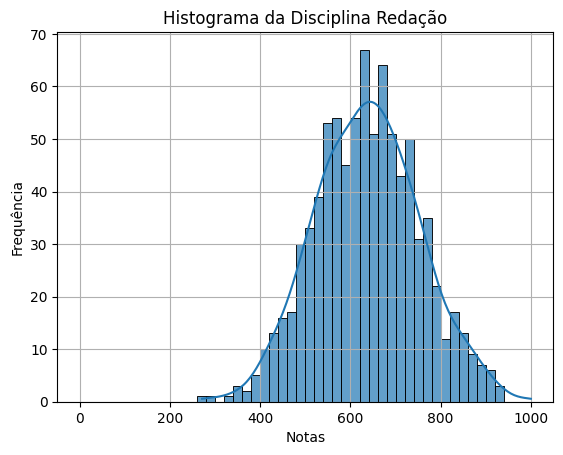

In [ ]:
# Criando o histograma Redação range 0,1000
sns.histplot(data=df_redacao, bins=range(0,1000,20), alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma da Disciplina Redação')

# Exibindo o histograma
plt.grid(True)
plt.show()

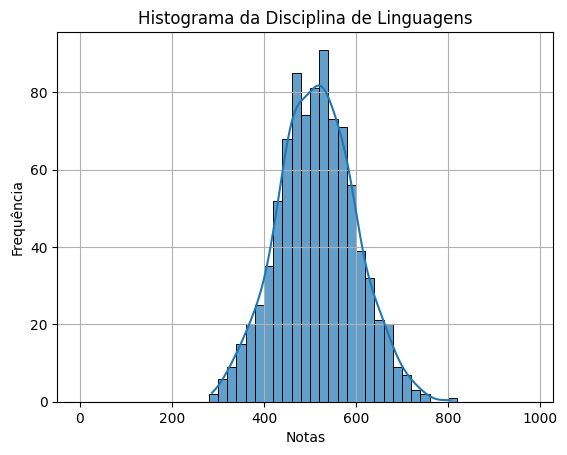

In [ ]:
# Criando o histograma Linguagens range 1,1000
sns.histplot(data=df_linguagens, bins=range(0,1000,20), alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma da Disciplina de Linguagens')

# Exibindo o histograma
plt.grid(True)
plt.show()

O histograma de redação ficou Assimétrico á esquerda e o de linguagens permaneceu Simétrico.

## 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

In [ ]:
# Removendo valores nulos
df_quartil = df_enem[['Ciências da natureza', 'Redação']].dropna()

In [ ]:
# Calculando os quartis utilizando o método IQR
quartis = df_quartil.quantile([0.25, 0.5, 0.75])

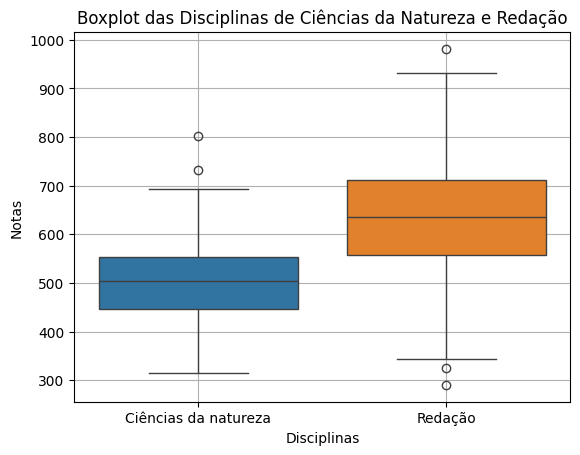

In [ ]:
# Criando o boxplot
sns.boxplot(data=df_quartil)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')

# Exibindo o boxplot
plt.grid(True)
plt.show()

In [ ]:
# Utilizando o método IQR
def find_outlier_iqr(dataset, colname):
  Q1 = np.quantile(dataset[colname], 0.25)
  Q3 = np.quantile(dataset[colname], 0.75)

# Calculando  IQR
  iqr = Q3 - Q1

# Calculando outlier cutoff
  cut_off = iqr * 1.5

# Calculando margens inferiores (lower) e superiores (upper)
  lower = Q1 - cut_off
  upper = Q3 + cut_off

# Criando uma lista vazia para receber os Outliers e uma função para adicionar os Outliers a lista
  outliers = []

  for I in dataset[colname].values:
    if((I > upper) or (I < lower)):
      outliers.append(I)

# Imprimindo a resposta
  print(f"Disciplina: {colname}.")
  print(f"Número de outliers encontrado: {len(outliers)}.")
  print(f"IQR: {iqr}. \nValor mínimo: {lower}. \nValor máximo: {upper}.\n")

# Criando um for para a filtrar a resposta
for column in df_quartil:
    find_outlier_iqr(df_quartil, column)

Disciplina: Ciências da natureza.
Número de outliers encontrado: 2.
IQR: 105.71203439857504. 
Valor mínimo: 288.62930428768743. 
Valor máximo: 711.4774418819876.

Disciplina: Redação.
Número de outliers encontrado: 3.
IQR: 155.0016325121751. 
Valor mínimo: 324.7155138926373. 
Valor máximo: 944.7220439413377.



## 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)


In [ ]:
# Essa função busca outliers e substitui seu valor para NaN (valor nulo)
def replace_na_outlier_zscore(dataset, threshold, colname):
  df_enem = dataset[colname]
  outliers = []
  zscore = []
  val = []
  threshold = threshold
  mean = np.mean(df_enem)
  std = np.std(df_enem)

  for I in df_enem.values:
    z_score = (I - mean) / std
    zscore.append(z_score)

    if np.abs(z_score) > threshold:
      outliers.append(I)
      val.append(np.nan)
    else:
      val.append(I)

  return val

In [ ]:
# Essa função remove os outliers removendo todos os valores nulos
def drop_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

In [ ]:
# Essa função valida se existe alteração significativa
def validar_diferenca(diferenca_percentual):
  if diferenca_percentual < 5:
    return "Não. A remoção dos outliers não resultou em alterações significativas na média nacional"
  else:
    return "Sim. A remoção dos outliers resultou em alterações significativas na média nacional"

In [ ]:
# Criando um DataFrame sem outliers
df_original = df_enem.copy()
df_sem_outliers = drop_outliers(df_original, 3)

In [ ]:
# Calculando a média nacional
media_nacional_original = df_enem.mean(numeric_only=True).mean()
media_nacional_sem_outliers = df_sem_outliers.mean(numeric_only=True).mean()

In [ ]:
# Calculando diferença percentual
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

# Imprimindo a resposta
print(f"Média nacional antes de remover outliers: {media_nacional_original}.")
print(f"Média nacional após remover outliers: {media_nacional_sem_outliers}.")
print(f"Diferença percentual entre as médias: {diferenca_percentual}.")
print(f"Podemos concluir que: {validar_diferenca(diferenca_percentual)}.")

Média nacional antes de remover outliers: 544.0470449374693.
Média nacional após remover outliers: 545.3712753854101.
Diferença percentual entre as médias: 0.2434036652276921.
Podemos concluir que: Não. A remoção dos outliers não resultou em alterações significativas na média nacional.


## 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
# Dataframe original com valores nulos
df_original = df_enem.select_dtypes(include=np.number)

In [ ]:
# Selecionando apenas as colunas numéricas
colunas_numericas = df_enem.select_dtypes(include=np.number).columns

In [ ]:
# Substituindo valores nulos de cada coluna pela média
df_media = df_original.copy()
for coluna in colunas_numericas:
    media_coluna = df_original[coluna].mean()
    df_media[coluna].fillna(media_coluna, inplace=True)

In [ ]:
# Substituindo valores nulos de cada coluna pela moda
df_moda = df_original.copy()
for coluna in colunas_numericas:
    moda_coluna = df_original[coluna].mode()[0]
    df_moda[coluna].fillna(moda_coluna, inplace=True)

df_mediana = df_original.copy()
for coluna in colunas_numericas:
    mediana_coluna = df_original[coluna].median()
    df_mediana[coluna].fillna(mediana_coluna, inplace=True)

In [ ]:
# Encontra melhor medida para média (a que mais se aproxima do Dataframe Original)
medias_originais = df_original.mean()

In [ ]:
# Inicializa com um valor grande
menor_diferenca = float('inf')
tipo_dataframe = None

# Calculando a diferença absoluta entre as médias de cada coluna
for nome_dataframe, dataframe in zip(["Média", "Moda", "Mediana"], [df_media, df_moda, df_mediana]):
    diferenca_absoluta = (dataframe.mean() - medias_originais).abs()

# Verificando se essa diferença é menor que a menor diferença encontrada até agora
    if diferenca_absoluta.sum() < menor_diferenca:
        menor_diferenca = diferenca_absoluta.sum()
        tipo_dataframe = nome_dataframe

# Imprimindo a resposta
print(f"Após a substituição dos valores nulos, a medida de tendência central que menos impactou a média geral foi a {tipo_dataframe}.")

Após a substituição dos valores nulos, a medida de tendência central que menos impactou a média geral foi a Média.
